# Installing dependencies

In [24]:
%pip install opencv-python
%pip install numpy
%pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Imports and Variables

In [25]:
import cv2                      # For reading and writing of image
import numpy as np              # Just for converting to and from numpy arrays to python lists
import matplotlib.pyplot as plt # Just for plotting the histograms

VIRDIS_COLOR_PALLETE = [[253, 231, 37], [94, 201, 98], [33, 145, 140], [59, 82, 139], [68, 1, 84]]

color_image_path = "../media/sample_image_color.jpg"
grayscale_image_path = "../media/sample_image_grayscale.jpg"
low_contrast_image_path = "../media/sample_image_low_contrast.jpg"

# Helper Functions

In [26]:
def is_grayscale(image_arr):
    if (type(image_arr[0][0]) == int):
        return True
    
def find_num_of_channels(image_arr):
    if (type(image_arr[0][0]) == int):
        return 1
    else:
        return len(image_arr[0][0])
    
# Only for grayscale images
def plot_histogram(img_arr, title, x_label, y_label):
    grayscale_image = is_grayscale(img_arr)
    if not grayscale_image:
        print("Image is not grayscale")
        return
    freq_arr = [0 for _ in range(256)]
    for row in img_arr:
        for col in row:
            freq_arr[col] += 1
    plt.bar([i for i in range(256)], freq_arr)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def make_same_dim(image_arr_1, image_arr_2):
    img_1_height = len(image_arr_1)
    img_1_width = len(image_arr_1[0])
    img_2_height = len(image_arr_2)
    img_2_width = len(image_arr_2[0])
    final_height = final_width = 0
    if img_1_height > img_2_height:
        final_height = img_2_height
    else:
        final_height = img_1_height
    
    if img_1_width > img_2_width:
        final_width = img_2_width
    else:
        final_width = img_1_width

    new_image_arr_1 = list()
    new_image_arr_2 = list()
    for row_idx in range(final_height):
        new_image_arr_1.append(list())
        new_image_arr_2.append(list())
        for col_idx in range(final_width):
            new_image_arr_1[row_idx].append(image_arr_1[row_idx][col_idx])
            new_image_arr_2[row_idx].append(image_arr_2[row_idx][col_idx])
    return new_image_arr_1, new_image_arr_2

# Read Image in a Numpy array

In [27]:
def convert_bgr_to_rgb(bgr_img):
    rgb_img = list()
    for row in bgr_img:
        rgb_img.append(list())
        for pixel in row:
            rgb_img[-1].append(pixel[::-1])
    return rgb_img

def read_image_in_array(image_path):
    bgr_img = cv2.imread(image_path).tolist()
    rgb_img = convert_bgr_to_rgb(bgr_img)
    return rgb_img

def read_grayscale_image_in_array(image_path):
    grayscale_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).tolist()
    return grayscale_img

color_img_arr = read_image_in_array(color_image_path)
print("Color image dimension:", len(color_img_arr), len(color_img_arr[0]))
grayscale_img_arr = read_grayscale_image_in_array(grayscale_image_path)
print("Grayscale image dimension:", len(grayscale_img_arr), len(grayscale_img_arr[0]))
low_contrast_img_arr = read_image_in_array(low_contrast_image_path)
print("Low contrast image dimension:", len(low_contrast_img_arr), len(low_contrast_img_arr[0]))

print("Read images into arrays.")

Color image dimension: 375 563
Grayscale image dimension: 401 602
Low contrast image dimension: 360 484
Read images into arrays.


# Write a Numpy array into an image file

In [28]:
def convert_rgb_to_bgr(img_array):
    return convert_bgr_to_rgb(img_array)

def write_array_to_image(img_array, output_file_path):
    grayscale_image = is_grayscale(img_array)
    if not grayscale_image:
        brg_img = convert_rgb_to_bgr(img_array)
        cv2.imwrite(output_file_path, np.array(brg_img).astype(np.uint8))
    else:
        cv2.imwrite(output_file_path, np.array(img_array).astype(np.uint8))

# Changing Brightness of image

In [29]:
def change_brightness(img_arr, beta):
    grayscale_image = is_grayscale(img_arr)
    new_img_arr = list()
    if grayscale_image:
        for row in img_arr:
            new_img_arr.append([max(0, min(pixel + beta, 255)) for pixel in row])
    else:
        for row in img_arr:
            new_img_arr.append(list())
            for pixel in row:
                new_img_arr[-1].append([max(0, min(channel + beta, 255)) for channel in pixel])
    return new_img_arr

brighter_img_arr = change_brightness(color_img_arr, 30)
print("Changed the brightness of Image 1.")
write_array_to_image(brighter_img_arr, "../media/output_brightness.jpg")

Changed the brightness of Image 1.


# Changing contrast of an image

Changed the contrast of Image 1.
Stretched the contrast of Image 1.


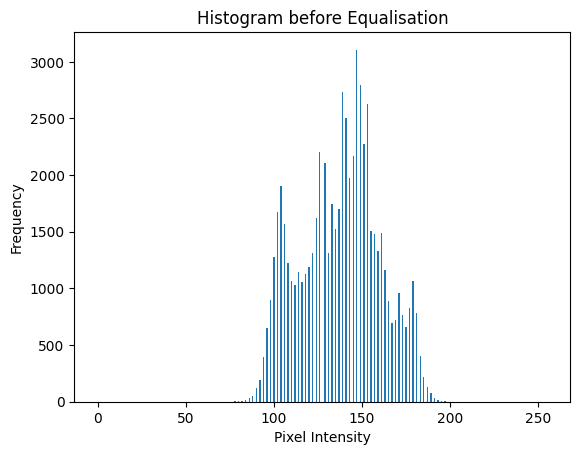

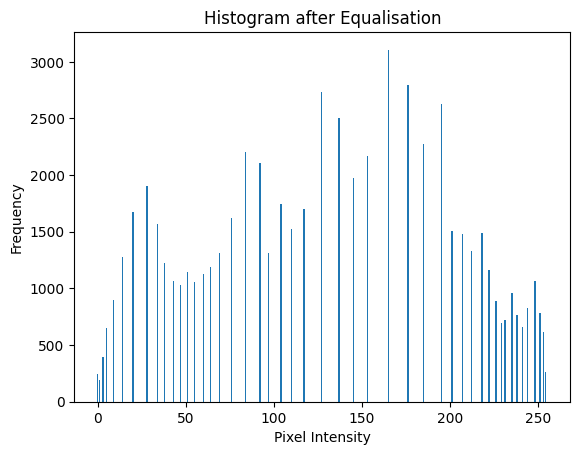

Histogram Equalised of Image 1.


In [30]:
def change_contrast(img_arr, alpha):
    grayscale_image = is_grayscale(img_arr)
    new_img_arr = list()
    if grayscale_image:
        for row in img_arr:
            new_img_arr.append([int(max(0, min(alpha * (pixel - 128) + 128, 255))) for pixel in row])
    else:
        for row in img_arr:
            new_img_arr.append(list())
            for pixel in row:
                new_img_arr[-1].append([max(0, min(alpha * (channel - 128) + 128, 255)) for channel in pixel])
    return new_img_arr

def stretch_contrast(img_arr):
    grayscale_image = is_grayscale(img_arr)
    new_img_arr = list()
    a_min = 0
    a_max = 255
    if grayscale_image:
        a_low = 255
        a_high = 0
        for row in img_arr:
            for pixel in row:
                a_low = min(a_low, pixel)
                a_high = max(a_high, pixel)
        
        for row in img_arr:
            new_img_arr.append([int((pixel - a_low) * (a_max - a_min) / (a_high - a_low) + a_min) for pixel in row])

    else:
        n_channels = find_num_of_channels(img_arr)
        a_low_arr = [255 for _ in range(n_channels)]
        a_high_arr = [0 for _ in range(n_channels)]
        # Calulating the lowest and highest pixel values for each channel
        for row in img_arr:
            for pixel in row:
                for channel_idx, channel in enumerate(pixel):
                    a_low_arr[channel_idx] = min(a_low_arr[channel_idx], channel)
                    a_high_arr[channel_idx] = max(a_high_arr[channel_idx], channel)
        
        # Stretching the contrast
        for row in img_arr:
            new_img_arr.append(list())
            for pixel in row:
                new_pixel = list()
                for channel_idx, channel in enumerate(pixel):
                    new_pixel.append(int((channel - a_low_arr[channel_idx]) * (a_max - a_min) / (a_high_arr[channel_idx] - a_low_arr[channel_idx]) + a_min))
                new_img_arr[-1].append(new_pixel)
    
    return new_img_arr

# Only for grayscale images
def equalise_histogram(img_arr):
    is_grayscale_image = is_grayscale(img_arr)
    if not is_grayscale_image:
        print("The image is not grayscale.")
        return
    img_height = len(img_arr)
    img_width = len(img_arr[0])
    total_pixels = img_height * img_width
    freq_arr = [0 for _ in range(256)]
    for row in img_arr:
        for pixel in row:
            freq_arr[pixel] += 1
    
    # Plotting Histogram before equalisation
    plot_histogram(img_arr, "Histogram before Equalisation", "Pixel Intensity", "Frequency")

    prob_arr = [float(freq) / total_pixels for freq in freq_arr]
    cumulative_prob_arr = list()
    cumulative_prob_arr.append(prob_arr[0])
    for i in range(1, 256):
        cumulative_prob_arr.append(cumulative_prob_arr[-1] + prob_arr[i])
    new_img_arr = list()
    for row in img_arr:
        new_img_arr.append(list())
        for pixel in row:
            new_img_arr[-1].append(int(255 * cumulative_prob_arr[pixel]))
    
    # Plotting Histogram after equalisation
    plot_histogram(new_img_arr, "Histogram after Equalisation", "Pixel Intensity", "Frequency")

    return new_img_arr

low_contrast_grayscale_image_path = "../media/sample_image_grayscale_low_contrast.jpg"
low_contrast_grayscale_img_arr = read_grayscale_image_in_array(low_contrast_grayscale_image_path)

contrasted_img_arr = change_contrast(low_contrast_grayscale_img_arr, 1.5)
print("Changed the contrast of Image 1.")
write_array_to_image(contrasted_img_arr, "../media/output_contrast.jpg")

stretched_img_arr = stretch_contrast(low_contrast_grayscale_img_arr)
print("Stretched the contrast of Image 1.")
write_array_to_image(stretched_img_arr, "../media/output_stretched.jpg")

histogram_equalised_img_arr = equalise_histogram(low_contrast_grayscale_img_arr)
print("Histogram Equalised of Image 1.")
write_array_to_image(histogram_equalised_img_arr, "../media/output_histogram_equalised.jpg")

# Changing Image to Grayscale

In [31]:
# Averaging out method
def convert_to_grayscale_m1(img_arr):
    new_img_arr = list()
    for row in img_arr:
        new_img_arr.append(list())
        for pixel in row:
            gray_val = int(sum(pixel) / len(pixel))
            new_img_arr[-1].append(gray_val)
    return new_img_arr

# Weighted Average method
def convert_to_grayscale_m2(img_arr, alpha, beta, gamma):
    new_img_arr = list()
    for row in img_arr:
        new_img_arr.append(list())
        for pixel in row:
            gray_val = int(alpha * pixel[0] + beta * pixel[1] + gamma * pixel[2])
            new_img_arr[-1].append(gray_val)
    return new_img_arr

# Desaturation Mehthod
def convert_to_grayscale_m3(img_arr):
    new_img_arr = list()
    for row in img_arr:
        new_img_arr.append(list())
        for pixel in row:
            gray_val = int((max(pixel) + min(pixel)) / 2)
            new_img_arr[-1].append(gray_val)
    return new_img_arr

# Single Channel Method
def convert_to_grayscale_m4(img_arr, channel_idx):
    new_img_arr = list()
    for row in img_arr:
        new_img_arr.append(list())
        for pixel in row:
            new_img_arr[-1].append(pixel[channel_idx])
    return new_img_arr

# Decomposition Method
def convert_to_grayscale_m5(img_arr, max_or_min):
    new_img_arr = list()
    for row in img_arr:
        new_img_arr.append(list())
        for pixel in row:
            if max_or_min == "max":
                gray_val = max(pixel)
            else:
                gray_val = min(pixel)
            new_img_arr[-1].append(gray_val)
    return new_img_arr

converted_grayscale_img_arr_m1 = convert_to_grayscale_m1(color_img_arr)
converted_grayscale_img_arr_m2 = convert_to_grayscale_m2(color_img_arr, 0.299, 0.587, 0.114)
converted_grayscale_img_arr_m3 = convert_to_grayscale_m3(color_img_arr)
converted_grayscale_img_arr_m4 = convert_to_grayscale_m4(color_img_arr, 0)
converted_grayscale_img_arr_m5 = convert_to_grayscale_m5(color_img_arr, "max")
print("Created Grayscale Images.")
write_array_to_image(converted_grayscale_img_arr_m1, "../media/output_grayscale_m1.jpg")
write_array_to_image(converted_grayscale_img_arr_m2, "../media/output_grayscale_m2.jpg")
write_array_to_image(converted_grayscale_img_arr_m3, "../media/output_grayscale_m3.jpg")
write_array_to_image(converted_grayscale_img_arr_m4, "../media/output_grayscale_m4.jpg")
write_array_to_image(converted_grayscale_img_arr_m5, "../media/output_grayscale_m5.jpg")

Created Grayscale Images.


# Grayscale image to color using pseudo color mapping

In [40]:
def get_color_map2(list_of_colors, n_divisons = 255):
    n_colors = len(list_of_colors)
    n_channels = len(list_of_colors[0])
    divs_per_color = n_divisons // (n_colors - 1)
    color_map = [list() for _ in range(n_channels)]
    for i in range(n_colors - 1):
        start_color = list_of_colors[i]
        end_color = list_of_colors[i + 1]
        for channel in range(len(start_color)):
            abs_diff = abs(end_color[channel] - start_color[channel])
            if end_color[channel] > start_color[channel]:
                color_map[channel].extend([int(start_color[channel] + j * abs_diff / divs_per_color) for j in range(divs_per_color + 1)])
            else:
                color_map[channel].extend([int(start_color[channel] - j * abs_diff / divs_per_color) for j in range(divs_per_color + 1)])
    return color_map

def get_color(val, color_map = None):
    if color_map is None:
        """ Method 1 """
        normalised_val = float(val) / 255
        # Defining Color map for RGB
        slope = [2, 2, 2] # For RGB
        # At y = 0
        x_intercept_0 = [0, 0.25, 0.5] # For RGB
        # At y = 1
        x_intercept_1 = [0.5, 0.75, 1] # For RGB
        # y intercept
        y_intercept = [0, -0.5, -1] # For RGB
        color = list()
        # Calculating the color
        for i in range(3):
            if normalised_val < x_intercept_0[i]:
                color.append(0)
            elif normalised_val < x_intercept_1[i]:
                # Without considering y-intercept
                color.append(int(slope[i] * (normalised_val - x_intercept_0[i]) * 255))
                # With considering y-intercept
                # color.append(int((slope[i] * (normalised_val - x_intercept_0[i]) - y_intercept[i]) * 255))
            else:
                color.append(255)
        return color
    else:
        """ Method 2 """
        color = list()
        for i in range(3):
            color.append(color_map[i][val])
        return color

def convert_grayscale_to_color(img_arr):
    new_img_arr = list()
    color_map = get_color_map2(VIRDIS_COLOR_PALLETE)
    for row in img_arr:
        new_img_arr.append(list())
        for pixel in row:
            new_img_arr[-1].append(get_color(pixel, color_map))
    return new_img_arr

pseudo_colored_img_arr = convert_grayscale_to_color(grayscale_img_arr)
print("Converted Image 2 to pseudo color.")
write_array_to_image(pseudo_colored_img_arr, "../media/output_pseudo_color.jpg")

Converted Image 2 to pseudo color.


# Replace Green Screen with background

In [33]:
def replace_green_screen_with_background(green_screen_img_arr, bg_img_arr):
    green_screen_img_arr, bg_img_arr = make_same_dim(green_screen_img_arr, bg_img_arr)
    final_img_arr = list()
    green_threshold = 200
    diff_threshold = 50
    for row_idx, row in enumerate(green_screen_img_arr):
        final_img_arr.append(list())
        for pixel_idx, pixel in enumerate(row):
            if pixel[1] > green_threshold and abs(pixel[1] - pixel[0]) > diff_threshold and abs(pixel[1] - pixel[2]) > diff_threshold:
                final_img_arr[-1].append(bg_img_arr[row_idx][pixel_idx])
            else:
                final_img_arr[-1].append(pixel)
    return final_img_arr

green_screen_img_arr = read_image_in_array("../media/sample_image_green_screen.jpg")
bg_img_arr = read_image_in_array("../media/sample_image_background.jpg")
final_img_arr = replace_green_screen_with_background(green_screen_img_arr, bg_img_arr)
print("Replaced green screen with background.")
write_array_to_image(final_img_arr, "../media/output_green_screen.jpg")

Replaced green screen with background.


# Reading and Writing a video file

In [34]:
def read_video_in_array(video_path):
    cap = cv2.VideoCapture(video_path)
    video_arr = list()
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        video_arr.append(frame.tolist())
    cap.release()
    return video_arr

video_path = "../media/sample_video.mp4"
video_arr = read_video_in_array(video_path)
print("Read the video in array.")

print(np.array(video_arr).shape)

enhanced_video_arr = list()
for frame in video_arr:
    enhanced_video_arr.append(change_brightness(frame, 100))

def write_array_to_video(video_arr, output_file_path):
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    height, width = len(video_arr[0]), len(video_arr[0][0])
    out = cv2.VideoWriter(output_file_path, fourcc, 20.0, (width, height))

    for frame in video_arr:
        out.write(np.array(frame).astype(np.uint8))
    out.release()

output_file_path = '../media/output_video.mp4'
write_array_to_video(enhanced_video_arr, output_file_path)
print("Wrote the enhanced video to output_video.mp4")

Read the video in array.
(31, 240, 320, 3)
Wrote the enhanced video to output_video.mp4


# Transition Video

In [35]:
def create_transition_video(start_img_arr, end_img_arr, n_frames, transition_type):
    start_img_arr, end_img_arr = make_same_dim(start_img_arr, end_img_arr)
    transition_video_arr = list()
    if transition_type == "fade":
        for frame_idx in range(n_frames):
            alpha = float(frame_idx) / n_frames
            beta = 1 - alpha
            transition_frame = list()
            for row_idx in range(len(start_img_arr)):
                transition_frame.append(list())
                for pixel_idx in range(len(start_img_arr[0])):
                    start_pixel = start_img_arr[row_idx][pixel_idx]
                    end_pixel = end_img_arr[row_idx][pixel_idx]
                    transition_frame[-1].append([int(start_pixel[channel] * beta + end_pixel[channel] * alpha) for channel in range(len(start_pixel))])
            transition_video_arr.append(transition_frame)
    if transition_type == "slide":
        for frame_idx in range(n_frames):
            transition_frame = list()
            for row_idx in range(len(start_img_arr)):
                transition_frame.append(list())
                for pixel_idx in range(len(start_img_arr[0])):
                    if pixel_idx < 20 * frame_idx:
                        transition_frame[-1].append(start_img_arr[row_idx][pixel_idx])
                    else:
                        transition_frame[-1].append(end_img_arr[row_idx][pixel_idx])
            transition_video_arr.append(transition_frame)
    return transition_video_arr

img_1_path = "../media/sample_transition_image_1.jpg"
img_2_path = "../media/sample_transition_image_2.jpg"

start_img_arr = read_image_in_array(img_1_path)
end_img_arr = read_image_in_array(img_2_path)

transition_video_fade_arr = create_transition_video(start_img_arr, end_img_arr, 50, "fade")
write_array_to_video(transition_video_fade_arr, "../media/output_transition_video_fade.mp4")
print("Created the fade transition video.")
transition_video_slide_arr = create_transition_video(start_img_arr, end_img_arr, 50, "slide")
write_array_to_video(transition_video_slide_arr, "../media/output_transition_video_slide.mp4")
print("Created the slide transition video.")

Created the fade transition video.
Created the slide transition video.
